#### Data preprocessing is that arrange data before machine learning. In other words, the data becomes suitable for machine learning.

1. Data Cleaning
- Noisy data
- Missing data analysis
- Outlier analysis

2. Data Standardization, Feature Scaling
- 0-1 transformation (normalization)
- Z - score conversion (standardization)
- Log transformation

3. Data Reduction
- Reducing the number of observations
- Reducing the number of variables

4. Variable Transformation
- Numerical variables transformation
- Categorical variables transformation

**Outlier observation**: Observations that fall well outside the general trend in the data or are quite different from other observations

### to catch the outlier values

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna() # delete missing values

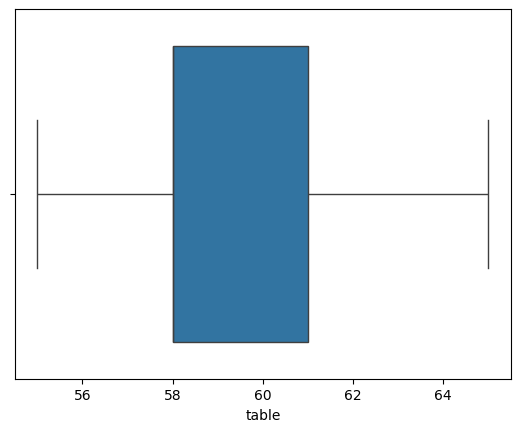

In [8]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

df_table = df["table"].head()
a = sns.boxplot(x = df_table)
plt.show()

In [9]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

IQR = Q3 - Q1

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

Q1 = 58.0, Q3 = 61.0, IQR = 3.0


In [11]:
low_lmt = Q1 - 1.5 * IQR # 58.0 - 1.5 * 3.0 = 53.5: low_lmt
up_lmt = Q3 + 1.5 * IQR # 61.0 + 1.5 * 3.0 = 65.5: up_lmt

(df_table < low_lmt) | (df_table > up_lmt)

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [16]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [12]:
outlier_df = (df_table < low_lmt) | (df_table > up_lmt)
a = df_table[outlier_df]

Series([], Name: table, dtype: float64)

In [14]:
a = df_table[outlier_df].index
a

Index([], dtype='int64')

### to solve the outlier value problem

In [17]:
# deletion structure

import pandas as pd

type(df_table)

pandas.core.series.Series

In [18]:
df_table = pd.DataFrame(df_table)
df_table.shape

(5, 1)

In [19]:
d_df = df_table[~((df_table < (low_lmt))) | ((df_table > (up_lmt))).any(axis=1)]
d_df.shape

(5, 1)

In [21]:
# structure of change with mean

df_table[outlier_df] = df_table.mean()
mmean = df_table[outlier_df]
print(mmean)

Empty DataFrame
Columns: [table]
Index: []


In [22]:
# suppression method

df_table[outlier_df] = low_lmt
# or
df_table[outlier_df] = up_lmt

### Local Outlier Factor (LOF)
Identifying values ​​that may be outliers by scoring observations based on density in their location

In [24]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [34]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
fit = clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
print(df_scores[0:10])


[-1.58352526 -1.59732899 -1.62278873 -1.33002541 -1.30712521 -1.28408436
 -1.28428162 -1.26458706 -1.28422952 -1.27351342]


In [35]:
np.sort(df_scores[0:10])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [36]:
np.sort(df_scores)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [37]:
threshold_val = np.sort(df_scores)[13] # number of 13 is our threshold value
outlier_df = df_scores > threshold_val
new_df = df[df_scores > threshold_val]

df[df_scores < threshold_val]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [38]:
# suppression method

suppression_val = df[df_scores == threshold_val]
outliers = df[~outlier_df]
outliers.to_records(index = False)
res = outliers.to_records(index = False)
res[:] = suppression_val.to_records(index = False)
df[~outlier_df] = pd.DataFrame(res, index = df[~outlier_df].index)

### Missing observation analysis

#### Missing data analysis

In [20]:
# import warnings

# warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)

import numpy as np
import pandas as pd

N1 = np.array([1,3,4,5,6,np.NAN, 8, 9, np.NAN])
N2 = np.array([12, np.NAN, 14, 15, 16, np.NAN, 18, 19, 20])
N3 = np.array([np.NAN, 22, 23, 24, np.NAN, 27, 28,29, 30])
df = pd.DataFrame({"N1": N1,
                  "N2": N2,
                  "N3": N3})
df

,N1,N2,N3
0,1.0,12.0,NaN
1,3.0,NaN,22.0
2,4.0,14.0,23.0
3,5.0,15.0,24.0
4,6.0,16.0,NaN
5,NaN,NaN,27.0
6,8.0,18.0,28.0
7,9.0,19.0,29.0
8,NaN,20.0,30.0


In [4]:
# to reach missing values in data

nll = df.isnull().sum()
nll

N1    2
N2    2
N3    2
dtype: int64

In [7]:
# to reach not NA values

ntll = df.notnull().sum()
ntll

N1    7
N2    7
N3    7
dtype: int64

In [8]:
# reaching structures containing missing values 

mis = df[df.isnull().any(axis = 1)]
mis

,N1,N2,N3
0,1.0,12.0,NaN
1,3.0,NaN,22.0
4,6.0,16.0,NaN
5,NaN,NaN,27.0
8,NaN,20.0,30.0


In [9]:
# reaching full values

fll = df[df.notnull().all(axis=1)]
fll

,N1,N2,N3
2,4.0,14.0,23.0
3,5.0,15.0,24.0
6,8.0,18.0,28.0
7,9.0,19.0,29.0


In [16]:
# delete missing values directly

df = df.dropna(inplace = True)
df

In [23]:
# fill missing values with average directly

mn = df["N1"].mean()
fill = df["N1"].fillna(df["N1"].mean())

mn

5.142857142857143

In [24]:
fill

0    1.000000
1    3.000000
2    4.000000
3    5.000000
4    6.000000
5    5.142857
6    8.000000
7    9.000000
8    5.142857
Name: N1, dtype: float64

In [26]:
# make to fill process by functional programming

aply = df.apply(lambda x: x.fillna(x.mean(), axis = 0))
aply

,N1,N2,N3
0,1.000000,12.000000,26.142857
1,3.000000,16.285714,22.000000
2,4.000000,14.000000,23.000000
3,5.000000,15.000000,24.000000
4,6.000000,16.000000,26.142857
5,5.142857,16.285714,27.000000
6,8.000000,18.000000,28.000000
7,9.000000,19.000000,29.000000
8,5.142857,20.000000,30.000000


### to visualize missing data structure

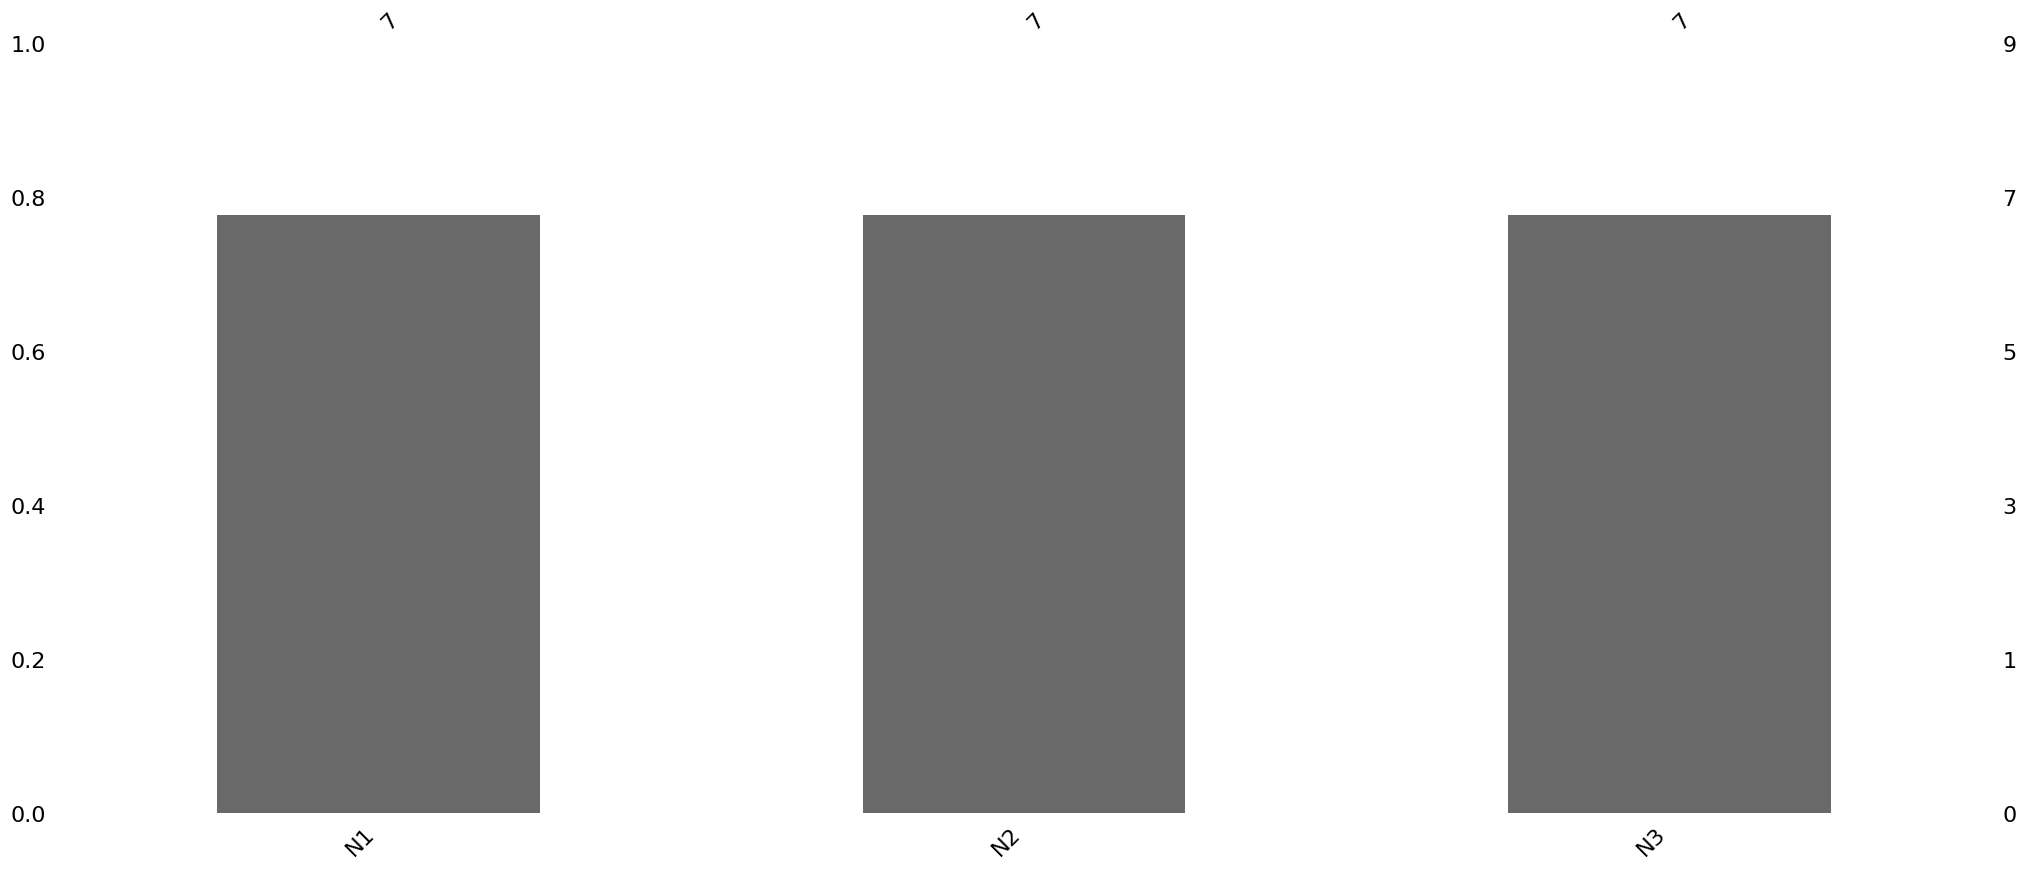

In [31]:
import missingno as ms
import matplotlib.pyplot as plt

# total observation number and how much are there missing data
ms.bar(df)
plt.show()

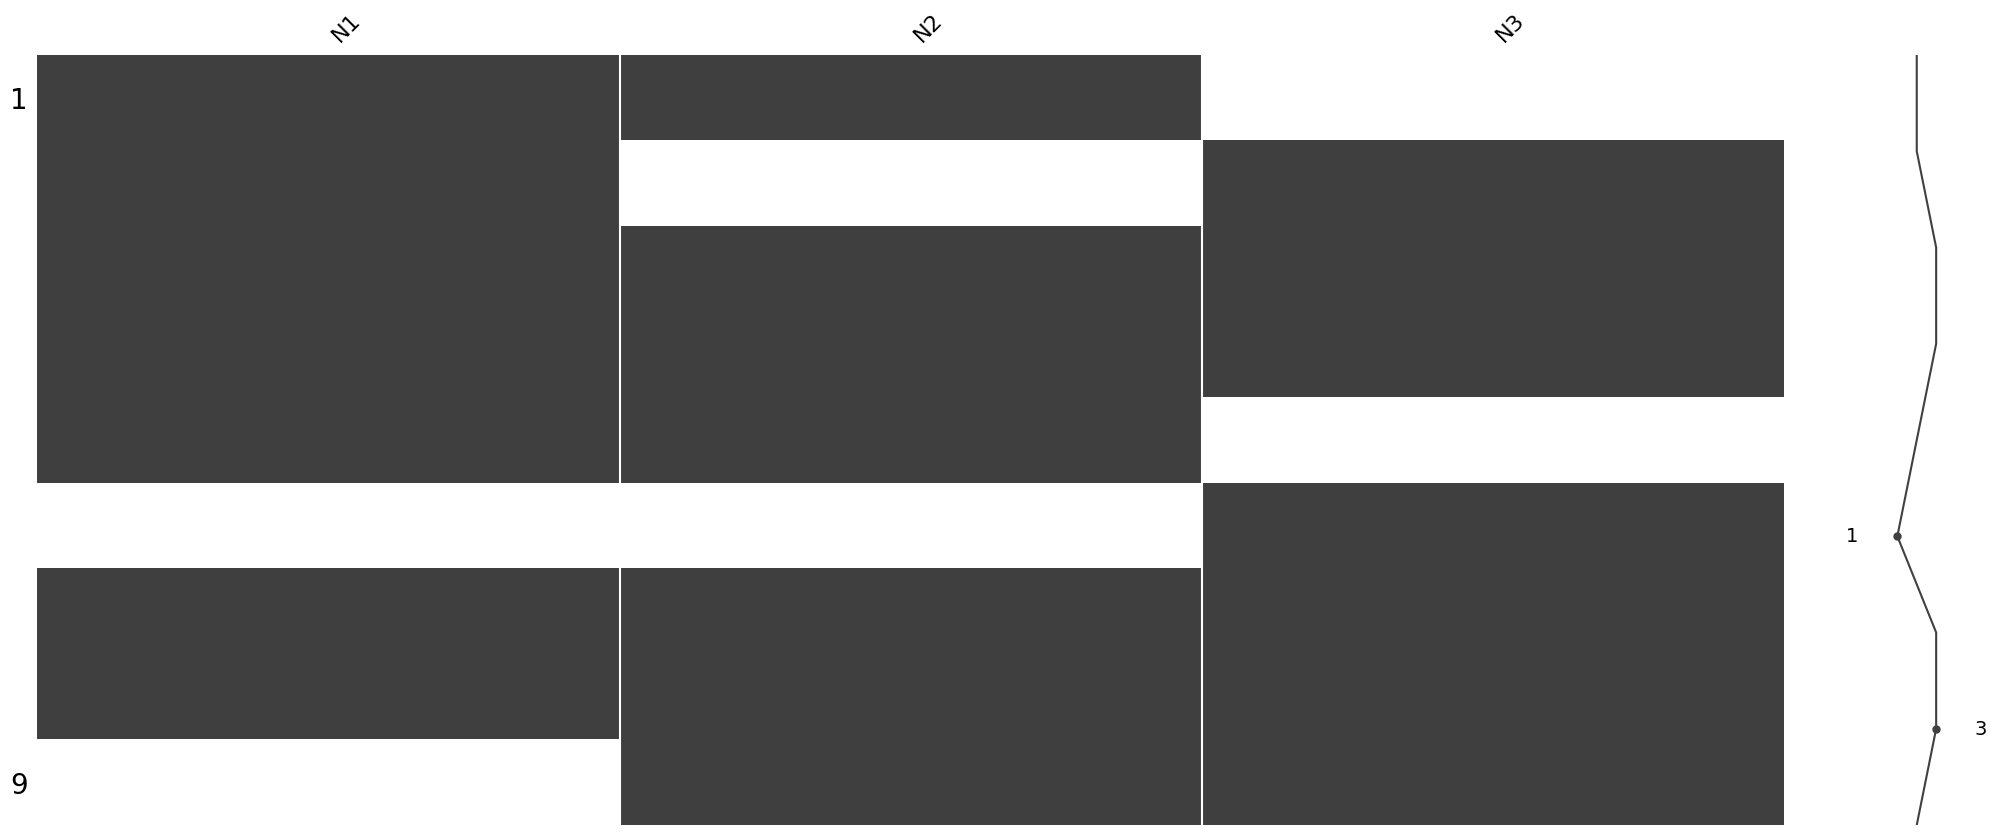

In [32]:
# determine missing value depends on table 

ms.matrix(df)
plt.show()

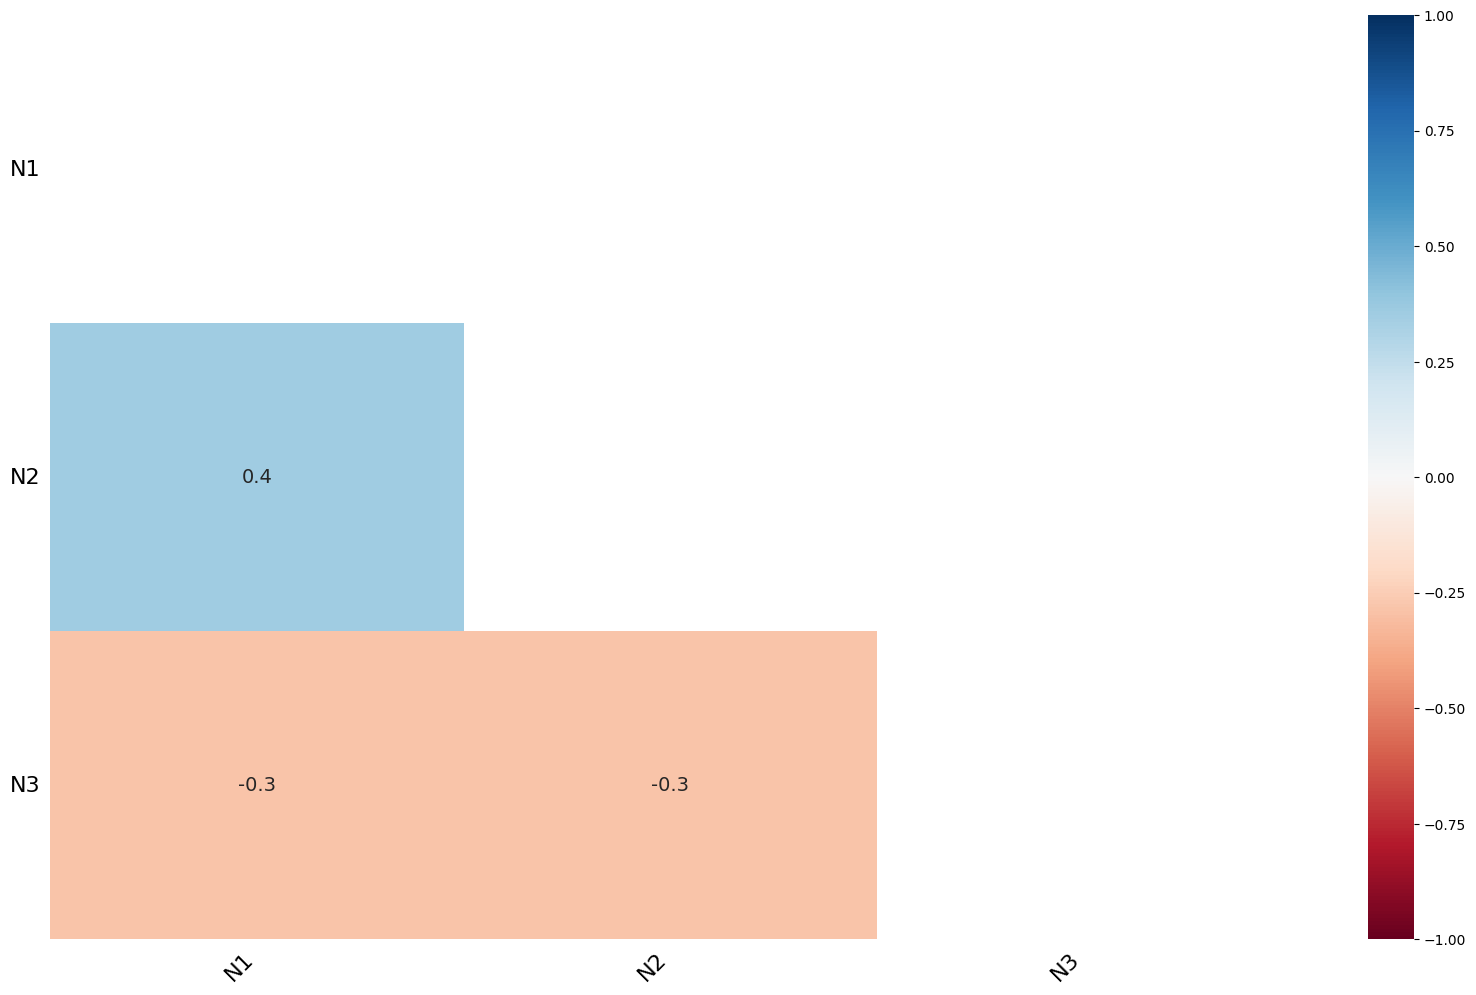

In [33]:
# proportional observation between the values 

ms.heatmap(df)
plt.show()

### Deletion methods 

In [3]:
# if there is even a missing value, then we are deleting all missing values with this method.

df.dropna()

,N1,N2,N3
2,4.0,14.0,23.0
3,5.0,15.0,24.0
6,8.0,18.0,28.0
7,9.0,19.0,29.0


In [4]:
# to delete only all data are 'nan'

# df.dropna(how = 'all')

# or

df.dropna(axis = 1, how = 'all')

,N1,N2,N3
0,1.0,12.0,NaN
1,3.0,NaN,22.0
2,4.0,14.0,23.0
3,5.0,15.0,24.0
4,6.0,16.0,NaN
5,NaN,NaN,27.0
6,8.0,18.0,28.0
7,9.0,19.0,29.0
8,NaN,20.0,30.0


### Basic assign value methods

In [6]:
# to assign numerical variables

df["N1"].fillna(0) # this line will assign zero for 'nan' values.

0    1.0
1    3.0
2    4.0
3    5.0
4    6.0
5    0.0
6    8.0
7    9.0
8    0.0
Name: N1, dtype: float64

In [8]:
# fill with the average of the values.

df["N1"].fillna(df["N1"].mean())

0    1.000000
1    3.000000
2    4.000000
3    5.000000
4    6.000000
5    5.142857
6    8.000000
7    9.000000
8    5.142857
Name: N1, dtype: float64

In [10]:
# 'nan' values in all data

df.apply(lambda x: x.fillna(x.mean()))

,N1,N2,N3
0,1.000000,12.000000,26.142857
1,3.000000,16.285714,22.000000
2,4.000000,14.000000,23.000000
3,5.000000,15.000000,24.000000
4,6.000000,16.000000,26.142857
5,5.142857,16.285714,27.000000
6,8.000000,18.000000,28.000000
7,9.000000,19.000000,29.000000
8,5.142857,20.000000,30.000000


In [12]:
# other method:

df.fillna(df.mean()[:])

,N1,N2,N3
0,1.000000,12.000000,26.142857
1,3.000000,16.285714,22.000000
2,4.000000,14.000000,23.000000
3,5.000000,15.000000,24.000000
4,6.000000,16.000000,26.142857
5,5.142857,16.285714,27.000000
6,8.000000,18.000000,28.000000
7,9.000000,19.000000,29.000000
8,5.142857,20.000000,30.000000


In [14]:
df.fillna(df.mean()["N1": "N2"])

,N1,N2,N3
0,1.000000,12.000000,NaN
1,3.000000,16.285714,22.0
2,4.000000,14.000000,23.0
3,5.000000,15.000000,24.0
4,6.000000,16.000000,NaN
5,5.142857,16.285714,27.0
6,8.000000,18.000000,28.0
7,9.000000,19.000000,29.0
8,5.142857,20.000000,30.0


In [15]:
df.fillna(df["N3"].median())

,N1,N2,N3
0,1.0,12.0,27.0
1,3.0,27.0,22.0
2,4.0,14.0,23.0
3,5.0,15.0,24.0
4,6.0,16.0,27.0
5,27.0,27.0,27.0
6,8.0,18.0,28.0
7,9.0,19.0,29.0
8,27.0,20.0,30.0


In [17]:
# another method:

df.where(pd.notna(df), df.mean(), axis = "columns")

,N1,N2,N3
0,1.000000,12.000000,26.142857
1,3.000000,16.285714,22.000000
2,4.000000,14.000000,23.000000
3,5.000000,15.000000,24.000000
4,6.000000,16.000000,26.142857
5,5.142857,16.285714,27.000000
6,8.000000,18.000000,28.000000
7,9.000000,19.000000,29.000000
8,5.142857,20.000000,30.000000


### assign value for categoical variable

In [24]:
N4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame({"salary": N1,
                  "N2": N2,
                  "N3": N3,
                  "department": N4})

df.groupby("department")["salary"].mean()

department
IK    5.750000
IT    4.333333
Name: salary, dtype: float64

In [26]:
df.fillna(df.groupby("department")["salary"].transform("mean"))

,salary,N2,N3,department
0,1.0,12.0,NaN,IT
1,3.0,NaN,22.0,IT
2,4.0,14.0,23.0,IK
3,5.0,15.0,24.0,IK
4,6.0,16.0,NaN,IK
5,NaN,NaN,27.0,IK
6,8.0,18.0,28.0,IK
7,9.0,19.0,29.0,IT
8,NaN,20.0,30.0,IT


In [28]:
# gave an average by department

df["salary"].fillna(df.groupby("department")["salary"].transform("mean"))

0    1.000000
1    3.000000
2    4.000000
3    5.000000
4    6.000000
5    5.750000
6    8.000000
7    9.000000
8    4.333333
Name: salary, dtype: float64

### assign value for categorical values

In [32]:
import numpy as np
import pandas as pd

N1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
N4 = np.array(["IT", np.NaN, "IT", "IT", "IK", np.NaN, "IK", "IK", "IK"], dtype= object)

df = pd.DataFrame({"salary": N1,
                  "department": N4})

df["department"].mode()[0]

'IK'

In [33]:
df["department"].fillna(df["department"].mode()[0])

0    IT
1    IK
2    IT
3    IT
4    IK
5    IK
6    IK
7    IK
8    IK
Name: department, dtype: object

In [35]:
df["department"].fillna(df["department"].bfill())

0    IT
1    IT
2    IT
3    IT
4    IK
5    IK
6    IK
7    IK
8    IK
Name: department, dtype: object

In [36]:
df["department"].fillna(df["department"].ffill())

0    IT
1    IT
2    IT
3    IT
4    IK
5    IK
6    IK
7    IK
8    IK
Name: department, dtype: object

### predictive value assignment method

In [37]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64", "int64"])

print(df.head())

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


In [39]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [41]:
# pip install ycimpute

   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
   ---------------------------------------- 0.4/198.5 MB 8.9 MB/s eta 0:00:23
   ---------------------------------------- 2.1/198.5 MB 22.2 MB/s eta 0:00:09
    --------------------------------------- 4.8/198.5 MB 34.5 MB/s eta 0:00:06
   - -------------------------------------- 7.5/198.5 MB 40.0 MB/s eta 0:00:05
   -- ------------------------------------- 10.3/198.5 MB 46.7 MB/s eta 0:00:05
   -- ------------------------------------- 13.6/198.5 MB 59.5 MB/s eta 0:00:04
   --- ------------------------------------ 16.3/198.5 MB 59.5 MB/s eta 0:00:04
   --- ------------------------------------ 19.3/198.5 MB 59.5 MB/s eta 0:00:04
   ---- ----------------------------------- 22.3/198.5 MB 59.5 MB/s eta 0:00:03
   ----- ---------------------------------- 25.7/198.5 MB 65.6 MB/s eta 0:00:03
   ----- ---------------------------------- 29.0/198.5 MB 65.6 MB/s eta 0:00:03
   ------ --------------------------------- 32.4/198.5

In [42]:
from ycimpute.imputer import knnimput
import numpy as np

var_names = list(df)
n_df = np.array(df)
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [44]:
dff = knnimput.KNN(k = 4).complete(n_df)
dff = pd.DataFrame(dff, columns = var_names)
dff.isnull().sum()

Imputing row 1/891 with 0 missing, elapsed time: 0.115
Imputing row 101/891 with 0 missing, elapsed time: 0.116
Imputing row 201/891 with 0 missing, elapsed time: 0.117
Imputing row 301/891 with 1 missing, elapsed time: 0.117
Imputing row 401/891 with 0 missing, elapsed time: 0.118
Imputing row 501/891 with 0 missing, elapsed time: 0.119
Imputing row 601/891 with 0 missing, elapsed time: 0.119
Imputing row 701/891 with 0 missing, elapsed time: 0.120
Imputing row 801/891 with 0 missing, elapsed time: 0.121


survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [50]:
from ycimpute.imputer import iterforest

dff = iterforest.IterImput().complete(n_df)
dff = pd.DataFrame(dff, columns = var_names)
dff.isnull().sum()

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [52]:
from ycimpute.imputer import EM
import numpy as np

n_df = np.array(df)
dff = EM().complete(n_df)
dff = pd.DataFrame(dff, columns = var_names)
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

### Data Standardization

In [2]:
import pandas as pd
import numpy as np

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame({"V1": V1,
                  "V2": V2,
                  "V3": V3})

df = df.astype(float)

In [4]:
from sklearn import preprocessing as pr

pr.scale(df) # did the standardization

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [5]:
# normalization process

pr.normalize(df) # will change the normalization process

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [7]:
# min-max tranformation

scaler = pr.MinMaxScaler(feature_range=(10,20))
print(scaler.fit_transform(df))

[[10.         12.85714286 11.11111111]
 [13.33333333 12.85714286 17.77777778]
 [18.33333333 10.         10.        ]
 [16.66666667 14.28571429 11.11111111]
 [20.         20.         20.        ]]


### Variable Transformations

#### 0-1 Transform

In [28]:
import seaborn as sns

tips = sns.load_dataset("tips")
df = tips.copy()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
lbe.fit_transform(df["sex"]) # so, all values transform "0" and "1". categorical to integer value.

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [10]:
df["int_sex"] = lbe.fit_transform(df["sex"])

df.head()

,total_bill,tip,sex,smoker,day,time,size,int_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


#### "1 and others (0)" transform

In [22]:
import numpy as np

df["int_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

df.head()

,total_bill,tip,sex,smoker,day,time,size,int_sex,int_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [23]:
df['int_day'].value_counts() # 1 = "Sun", 0 = "thur, fri, sat"

int_day
0    168
1     76
Name: count, dtype: int64

#### Multiclass transform

In [24]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

df["new_int_day"] = lbe.fit_transform(df["day"])

df.head()

,total_bill,tip,sex,smoker,day,time,size,int_sex,int_day,new_int_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


In [26]:
df["new_int_day"].value_counts() # this assigns number every catgorical value. (1, 2, 3, etc.)
# but this is dangerous for algorithm and machines.

new_int_day
1    87
2    76
3    62
0    19
Name: count, dtype: int64

#### one_hot transform and Dummy variable trap

In [30]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,False,True
1,10.34,1.66,No,Sun,Dinner,3,True,False
2,21.01,3.50,No,Sun,Dinner,3,True,False
3,23.68,3.31,No,Sun,Dinner,2,True,False
4,24.59,3.61,No,Sun,Dinner,4,False,True
